
# Analysis of StackOverflow 2018 survey result 

Here an analysis on the survey results would be done answering these questions

    -What is the lifestyle of a typical datascientist?

    -How satisfied are datascientist with their jobs compared to other kind  developers?

    -How much do Data scientist from Africa earn annually?

In [526]:
#import the neccesssary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [527]:
#read the dataset
df_2018=pd.read_csv('2018_survey_results_public.csv')

C:\Users\Tomiwa_Salau\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [528]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [529]:
#view the list of columns 
print(np.array(df_2018.columns))

['Respondent' 'Hobby' 'OpenSource' 'Country' 'Student' 'Employment'
 'FormalEducation' 'UndergradMajor' 'CompanySize' 'DevType' 'YearsCoding'
 'YearsCodingProf' 'JobSatisfaction' 'CareerSatisfaction' 'HopeFiveYears'
 'JobSearchStatus' 'LastNewJob' 'AssessJob1' 'AssessJob2' 'AssessJob3'
 'AssessJob4' 'AssessJob5' 'AssessJob6' 'AssessJob7' 'AssessJob8'
 'AssessJob9' 'AssessJob10' 'AssessBenefits1' 'AssessBenefits2'
 'AssessBenefits3' 'AssessBenefits4' 'AssessBenefits5' 'AssessBenefits6'
 'AssessBenefits7' 'AssessBenefits8' 'AssessBenefits9' 'AssessBenefits10'
 'AssessBenefits11' 'JobContactPriorities1' 'JobContactPriorities2'
 'JobContactPriorities3' 'JobContactPriorities4' 'JobContactPriorities5'
 'JobEmailPriorities1' 'JobEmailPriorities2' 'JobEmailPriorities3'
 'JobEmailPriorities4' 'JobEmailPriorities5' 'JobEmailPriorities6'
 'JobEmailPriorities7' 'UpdateCV' 'Currency' 'Salary' 'SalaryType'
 'ConvertedSalary' 'CurrencySymbol' 'CommunicationTools'
 'TimeFullyProductive' 'EducationType

# How satisfied are datascientist with their jobs compared to other developers


In [534]:
#Here we select applicable columns from the dataset that can answer this question

df_satis=df_2018[["OpenSource" , "Hobby", "DevType", "JobSatisfaction", "CareerSatisfaction", "HopeFiveYears", "AgreeDisagree1", "AgreeDisagree2", "AgreeDisagree3"]]

In [535]:
#here we filter for responses of datascientists and non-datascientist
ds_response = df_satis[df_2018["DevType"].str.contains("Data scientist") == True]
ds_response_nt = df_satis[df_2018["DevType"].str.contains("Data scientist") == False]

In [536]:
#we get the number of missing values in the response of datascientist
ds_response.isnull().sum()*100/ds_response.shape[0]

OpenSource             0.000000
Hobby                  0.000000
DevType                0.000000
JobSatisfaction       24.167607
CareerSatisfaction    11.103273
HopeFiveYears         11.893341
AgreeDisagree1        24.576749
AgreeDisagree2        24.365124
AgreeDisagree3        24.407449
dtype: float64

About 24% of the datascientist did not indicate their level of satisifaction with the job.

In [537]:
#we get the number of missing values in the response of non-datascientist
ds_response_nt.isnull().sum()*100/ds_response_nt.shape[0]

OpenSource             0.000000
Hobby                  0.000000
DevType                0.000000
JobSatisfaction       25.345253
CareerSatisfaction    18.015528
HopeFiveYears         18.828373
AgreeDisagree1        27.556758
AgreeDisagree2        27.423832
AgreeDisagree3        27.399130
dtype: float64

About 25% of the non-datascientist did not indicate their level of satisifaction with the job.

In [538]:
#rows with missing values were dropped
ds_clean_response=ds_response.dropna()
ds_clean_response_nt=ds_response_nt.dropna()

Here the null values were dropped as only a small percentage of the total values were null

In [539]:
#confirm no null values in data
ds_clean_response.isnull().sum()*100/ds_response.shape[0]

OpenSource            0.0
Hobby                 0.0
DevType               0.0
JobSatisfaction       0.0
CareerSatisfaction    0.0
HopeFiveYears         0.0
AgreeDisagree1        0.0
AgreeDisagree2        0.0
AgreeDisagree3        0.0
dtype: float64

In [540]:
ds_clean_response_nt.isnull().sum()*100/ds_response.shape[0]

OpenSource            0.0
Hobby                 0.0
DevType               0.0
JobSatisfaction       0.0
CareerSatisfaction    0.0
HopeFiveYears         0.0
AgreeDisagree1        0.0
AgreeDisagree2        0.0
AgreeDisagree3        0.0
dtype: float64

In [541]:
print(ds_clean_response.shape)
print(ds_clean_response_nt.shape)

(4597, 9)
(53248, 9)


In [483]:
#extract the job satisfaction index and count for Datascientist and non Datascientist
df=pd.DataFrame(ds_clean_response['JobSatisfaction'].value_counts().sort_values(ascending=True)).reset_index()
other=pd.DataFrame(ds_clean_response_nt['JobSatisfaction'].value_counts().sort_values(ascending=True)).reset_index()

In [543]:
print(df)
print(other)

                                index  JobSatisfaction
0              Extremely dissatisfied              162
1  Neither satisfied nor dissatisfied              283
2             Moderately dissatisfied              375
3               Slightly dissatisfied              381
4                  Slightly satisfied              619
5                 Extremely satisfied             1008
6                Moderately satisfied             1769
                                 inde  Non_DS JobSatisfation
0              Extremely dissatisfied                   1837
1  Neither satisfied nor dissatisfied                   3672
2             Moderately dissatisfied                   4907
3               Slightly dissatisfied                   5529
4                  Slightly satisfied                   7722
5                 Extremely satisfied                   9521
6                Moderately satisfied                  20060


In [545]:
other.rename(columns={'index':'inde', 'JobSatisfaction':'Non_DS JobSatisfation'}, inplace = True)

In [546]:
# Join the both Datascientist table and Non-Datascientist table into a single data table
df_consol=df.join(other,on=None, how='left', lsuffix='', rsuffix='', sort=False)
df_consol.drop(columns=['inde'], inplace = True)

#df_consol['JobSatisfaction','Non_DS JobSatisfation']*100/len(df_consol)

In [547]:
df_consol

,index,JobSatisfaction,Non_DS JobSatisfation
0,Extremely dissatisfied,162,1837
1,Neither satisfied nor dissatisfied,283,3672
2,Moderately dissatisfied,375,4907
3,Slightly dissatisfied,381,5529
4,Slightly satisfied,619,7722
5,Extremely satisfied,1008,9521
6,Moderately satisfied,1769,20060


In [548]:
# convert the values counts in the table to percentages
j=[]
for col in ['JobSatisfaction','Non_DS JobSatisfation']:
    i=df_consol[col] * 100/ df_consol[col].sum()
    j.append(i)
    
df_new=pd.DataFrame(np.transpose(j)).rename(columns={0:"DS_Satisfaction", 1: "Non_DS_Satisfaction"})


df_aggr=df_consol.join(df_new,on=None, how='left', lsuffix='', rsuffix='', sort=False)
df_aggr.drop(columns=["JobSatisfaction", "Non_DS JobSatisfation"], inplace = True)

In [549]:
df_aggr

,index,DS_Satisfaction,Non_DS_Satisfaction
0,Extremely dissatisfied,3.524037,3.449895
1,Neither satisfied nor dissatisfied,6.156189,6.896034
2,Moderately dissatisfied,8.157494,9.215370
3,Slightly dissatisfied,8.288014,10.383489
4,Slightly satisfied,13.465303,14.501953
5,Extremely satisfied,21.927344,17.880484
6,Moderately satisfied,38.481618,37.672776


In [560]:
# Create a bar plot to level of job satisfaction for both the Data scientist and the Non-Data scientist
def create_bar_plot(df, col, title, x_label, rot = 0):
    """Plot summary dataframe
    
    Args:
    df: dataframe. Summary dataframe for plotting.
    col: string. Column containing class labels.
    x_label: string. X-axis label.
    title: string. Plot title.
    rot: int or float. X-axis label rotation angle.
       
    Returns:
    None
    """    
    # Change df to long form
    long = pd.melt(df, id_vars=col, var_name='DevType', value_name='Percentage')
    
    # Create plot
    sns.catplot(x=col, y='Percentage', hue='DevType', data=long, kind='bar', legend = False);
    
    # Set plot labels
    plt.xlabel(x_label)
    plt.title(title, fontsize=14)
    plt.gca().legend().set_title('')
    
    plt.xticks(rotation=rot)

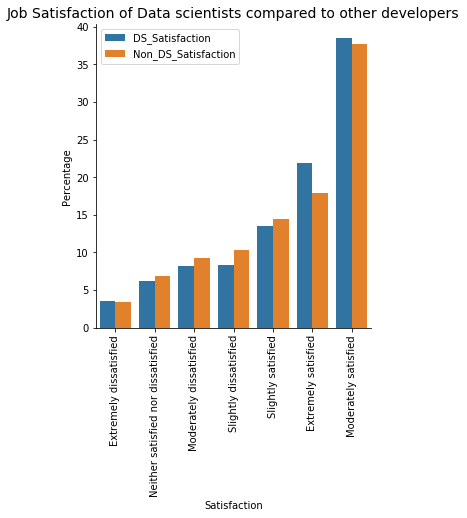

In [561]:
#Create plot
create_bar_plot(df_aggr,'index', 'Job Satisfaction of Data scientists compared to other developers', 'Satisfaction', rot=90)

As seen above Data scienist are more satisfied with their job compared to other developers. A higher percentage of Data scientist compared to other developers indicated more extreme satisfaction with their job as well as being moderately satisfied  while the lower spectrum of satisfaction was dominated by the other developers

# How much do datascientist from Africa earn 

The applcable columns would include 'Country'.'Salary', 'Employment'.

In [562]:
#import a list of AFrican couontries
African_countries=pd.read_csv('List of african countries.csv')
r=list(African_countries['title'])

In [563]:
#Extract the responses from African respondent
df_africa=df_2018[df_2018['Country'].isin(r)]
df_africa

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
7,10,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Designer;Front-end developer;QA or test developer,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
72,107,No,No,Algeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Fewer than 10 employees,Back-end developer;Database administrator;Desi...,...,I don't typically exercise,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat easy
120,177,Yes,No,South Africa,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Back-end developer;Desktop or enterprise appli...,...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,25 - 34 years old,No,NaN,The survey was an appropriate length,Very easy
158,245,Yes,Yes,Egypt,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Back-end developer;Front-end developer;Full-st...,...,I don't typically exercise,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Middle Eastern,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
185,283,Yes,Yes,Mozambique,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,Mobile developer,...,I don't typically exercise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,293,Yes,Yes,South Africa,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Back-end developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,303,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Information systems, information technology, o...",100 to 499 employees,Desktop or enterprise applications developer;P...,...,I don't typically exercise,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,No,NaN,The survey was an appropriate length,Very easy
301,436,Yes,No,Egypt,No,Employed full-time,Some college/university study without earning ...,"A business discipline (ex. accounting, finance...",20 to 99 employees,Back-end developer;Designer;Desktop or enterpr...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Middle Eastern,18 - 24 years old,No,NaN,The survey was too long,Neither easy nor difficult


In [566]:
#Extract the applicable columns from the dataset
df_sal_africa=df_africa[['Country','Salary', 'Employment','DevType', 'ConvertedSalary' ]]
df_sal_africa

,Country,Salary,Employment,DevType,ConvertedSalary
0,Kenya,NaN,Employed part-time,Full-stack developer,NaN
4,South Africa,260000,Employed full-time,Data or business analyst;Desktop or enterprise...,21426.0
7,Nigeria,NaN,Employed full-time,Designer;Front-end developer;QA or test developer,NaN
72,Algeria,NaN,Employed full-time,Back-end developer;Database administrator;Desi...,NaN
120,South Africa,29000,Employed full-time,Back-end developer;Desktop or enterprise appli...,28680.0
158,Egypt,3000,Employed full-time,Back-end developer;Front-end developer;Full-st...,36000.0
185,Mozambique,NaN,Employed part-time,Mobile developer,NaN
192,South Africa,NaN,Employed full-time,Back-end developer,NaN
200,South Africa,450000,Employed full-time,Desktop or enterprise applications developer;P...,37084.0
301,Egypt,NaN,Employed full-time,Back-end developer;Designer;Desktop or enterpr...,NaN


In [497]:
#Check number of missing values in the data
df_sal_africa.isnull().sum()

Country               0
Salary             1616
Employment          150
DevType             221
ConvertedSalary    1745
dtype: int64

In [498]:
#Drop missing values in the data
df_sal_africa.dropna(subset=['ConvertedSalary'], inplace=True)

C:\Users\Tomiwa_Salau\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Here all the null values were dropped, it is considerably better to use the actual value of the 'ConvertedSalary' for the analysis than to use a mean or mode populated values which can skew the output of your analysis.

In [499]:
#Filter out the Data scientists
ds_afric=df_sal_africa[df_sal_africa['DevType'].str.contains('Data scientist') == True]

In [500]:
ds_afric.shape

(63, 5)

In [567]:
#plot showing the probability density of the annual salary distribution of African Data scienstist
def dev_country_sal(df, col, dev_type, continent):
    '''
    INPUT - df - datatable cointaining salaries and related inforamtion for data scientist in Africa
            col - string - name of column used for plot
            dev_type - string - type of developer
            continent - string - name of continent
    OUTPUT - 
            desc - plot - Annual salary plot
    '''
    figsize = (15,10)
    df1 = pd.DataFrame({'Annual Salary (US$)':df[col]})
    ax = df1.plot(kind = 'kde')
    mean = df1['Annual Salary (US$)'].mean()
    ax.axvline(mean, linestyle = '--', color = 'red')
    ax.text((mean + 1400), (float(ax.get_ylim()[1])*0.75), 'mean = $ ' + str(round(mean,0)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-mean,mean+2*df1['Annual Salary (US$)'].std())
    ax.set_title('Annual Salary Distribution of {} in {}'.format(dev_type, continent), fontsize = 15, y = 1.05)
    #plt.savefig(filename,bbox_inches = 'tight')
    plt.show()
    return

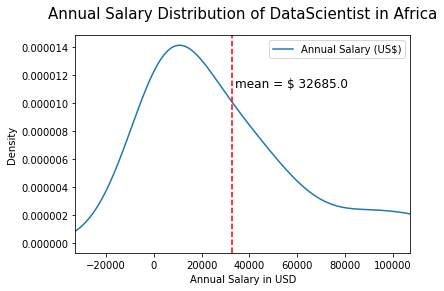

In [568]:
dev_country_sal(ds_afric, 'ConvertedSalary','DataScientist','Africa')

As seen, the plot above shows the annual salary distirbution of an African Data scientist with a mean salary $32,685 which is quite low compared to those earned by those in other regions, this might be due to the reduced competitve advantage possessed compared to other data scientist of different geographical origin


# What are the lifestyle of a typical datascientist

In [569]:
#Extract applicable columns
df_lfstyl=df_2018[['DevType', 'YearsCoding', 'YearsCodingProf', 'Employment', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals', 'Exercise']]
df_lfstyl

,DevType,YearsCoding,YearsCodingProf,Employment,WakeTime,HoursComputer,HoursOutside,SkipMeals,Exercise
0,Full-stack developer,3-5 years,3-5 years,Employed part-time,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,3 - 4 times per week
1,Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Employed full-time,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Daily or almost every day
2,Engineering manager;Full-stack developer,24-26 years,6-8 years,Employed full-time,NaN,NaN,NaN,NaN,NaN
3,Full-stack developer,18-20 years,12-14 years,Employed full-time,Between 6:01 - 7:00 AM,9 - 12 hours,Less than 30 minutes,3 - 4 times per week,I don't typically exercise
4,Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,Employed full-time,Before 5:00 AM,Over 12 hours,1 - 2 hours,Never,3 - 4 times per week
5,Back-end developer;Database administrator;Fron...,6-8 years,3-5 years,Employed full-time,Between 7:01 - 8:00 AM,9 - 12 hours,30 - 59 minutes,1 - 2 times per week,1 - 2 times per week
6,Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,Employed full-time,Between 9:01 - 10:00 AM,Over 12 hours,Less than 30 minutes,1 - 2 times per week,I don't typically exercise
7,Designer;Front-end developer;QA or test developer,0-2 years,3-5 years,Employed full-time,I do not have a set schedule,Over 12 hours,1 - 2 hours,Daily or almost every day,1 - 2 times per week
8,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,Employed full-time,Between 8:01 - 9:00 AM,9 - 12 hours,Less than 30 minutes,1 - 2 times per week,I don't typically exercise
9,Designer,0-2 years,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN


In [506]:
#filter out on response of solely data scientist
ds_lfstyl=df_lfstyl[df_lfstyl['DevType'].str.contains('Data scientist') == True]

In [514]:
ds_lfstyl.isnull().sum(axis=0).sort_values(ascending=True)

DevType               0
YearsCoding           2
Employment          128
YearsCodingProf     673
HoursComputer      1451
WakeTime           1456
Exercise           1458
HoursOutside       1463
SkipMeals          1470
dtype: int64

In [517]:
# Drop all missing data
ds_lfstyl.dropna(inplace=True)

C:\Users\Tomiwa_Salau\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


It is much easier to drop the null values which would have little or no impact on the overall output of the analysis

In [518]:
#confirm no nulls in data
ds_lfstyl.isnull().sum(axis=0).sort_values(ascending=True)

DevType            0
YearsCoding        0
YearsCodingProf    0
Employment         0
WakeTime           0
HoursComputer      0
HoursOutside       0
SkipMeals          0
Exercise           0
dtype: int64

In [519]:
ds_lfstyl.shape

(5421, 9)

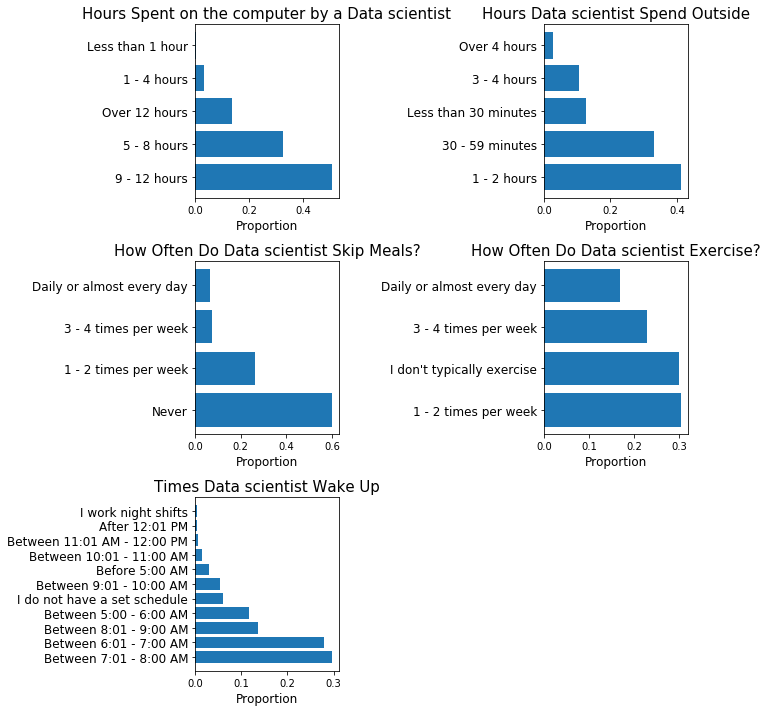

In [570]:
#Plot a bar chart of the differnt lifestyle activities undertaken by data scientist
figure = plt.figure(figsize=(10,10))


plt.subplot(3,2,1)
plt.barh(y=np.arange(5), width=(ds_lfstyl['HoursComputer'].value_counts())/(len(ds_lfstyl['HoursComputer'])))
plt.yticks(np.arange(5), ds_lfstyl['HoursComputer'].value_counts().index.tolist(), fontsize=12)
plt.title('Hours Spent on the computer by a Data scientist', fontsize=15)
plt.xlabel('Proportion', fontsize=12)

plt.subplot(3,2,2)
plt.barh(y = np.arange(5), width = (ds_lfstyl['HoursOutside'].value_counts())/(len(ds_lfstyl['HoursOutside'])))
plt.yticks(np.arange(5), ds_lfstyl['HoursOutside'].value_counts().index.tolist(),fontsize = 12)
plt.title('Hours Data scientist Spend Outside', fontsize = 15)
plt.xlabel('Proportion', fontsize  = 12)

plt.subplot(3,2,3)
plt.barh(y = np.arange(4), width = (ds_lfstyl['SkipMeals'].value_counts())/len(ds_lfstyl['SkipMeals']))
plt.yticks(np.arange(4), ds_lfstyl['SkipMeals'].value_counts().index.tolist(),fontsize = 12)
plt.title('How Often Do Data scientist Skip Meals?', fontsize = 15)
plt.xlabel('Proportion', fontsize  = 12)

plt.subplot(3,2,4)
plt.barh(y = np.arange(4), width = (ds_lfstyl['Exercise'].value_counts())/(len(ds_lfstyl['Exercise'])))
plt.yticks(np.arange(4), ds_lfstyl['Exercise'].value_counts().index.tolist(),fontsize = 12)
plt.title('How Often Do Data scientist Exercise?', fontsize = 15)
plt.xlabel('Proportion', fontsize  = 12)

plt.subplot(3,2,5)
plt.barh(y = np.arange(11), width = (ds_lfstyl['WakeTime'].value_counts())/(len(ds_lfstyl['WakeTime'])))
plt.yticks(np.arange(11), ds_lfstyl['WakeTime'].value_counts().index.tolist(),fontsize = 12)
plt.title('Times Data scientist Wake Up', fontsize = 15)
plt.xlabel('Proportion', fontsize  = 12)

plt.tight_layout()
plt.show()

A large proportion of Data scientist spends about 9–12 hours on the computer and 1–2 hours outside and slightly lower proportion spend about 5–8 hours on the computer and some 30–59 minutes outside
Large proportion of Data scientist never skip a meal, a lesser few do, 1- 2 times a week, while others 3–4 times per week to daily

Also large proportion of Data scientist work out 1–2 timer per week , also equally, a large proportion do not typical work out, while some others do from 3–4 times a week to almost everyday.

it is common for most Data scientist to wake up from 6 am to 8 am, as a large proportion of Data scientist usually wake up between that time, some others prefer a slightly later time such as 9 am to 10 am while some few prefer an earlier time from 5 am - 6 am.